# Início do Módulo 03

## Aula 01: Educação, Saúde e Tipos de Dados

In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
caminho = "/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

In [3]:
zip

<zipfile.ZipFile filename='/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip' mode='r'>

In [4]:
dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands=".", decimal=",")

In [5]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [6]:
dados.shape

(16556, 181)

In [7]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [9]:
dados.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [10]:
!ls

drive  sample_data


In [11]:
dados_sem_mudancas = dados.copy()

### Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).



In [12]:
# Unzipando os arquivos para a pasta. Deixei comentado para toda vez que for usar aqui ele não descompactar novamente
#!unzip /content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/PeNSE_2015_AMOSTRA2.zip -d /content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/

In [13]:
!ls /content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/

 Analise_pense_2015_Modulo03.ipynb  'arquivos xlsx'
'arquivos csv'			     Dicionario_PENSE_Microdados_AMOSTRA2.xls
'arquivos sas'			     PeNSE_2015_AMOSTRA2.zip


### Desafio 02 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)



###Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

REGEOGR -	Região geográfica (Variável Qualitativa Nominal)

VB01001 - Sexo (Variável Qualitativa Nominal)

VB01002	- Cor/Raça (Variável Qualitativa Nominal)

VB01004	- Mês (Variável Qualitativa Ordinal)

VB01005	- Ano de Nascimento (Variável Qualitativa Ordinal)

VB01021	- Ano/série (Variável Qualitativa Ordinal)

VB01010A - Pessoas que moram junto (Variável Quantitativa Discreta)

VB01003 - Idade (Variável Quantitativa Continua)



## Aula 02: Dados Qualitativos e Tabelas de frequência

In [14]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [15]:
#Distribuição do sexo dos respondentes em números totais
dados.VB01001.value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [16]:
#Distribuição do sexo dos respondentes em porcentagem

dados.VB01001.value_counts(normalize=True)*100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [17]:
'''
VB11007 -	Como você se sente em relação ao seu corpo?
1	Muito satisfeito(a)
2	Satisfeito(a)
3	Indiferente
4	Insatisfeito(a)
5	Muito insatisfeito(a)
99	Não informado
'''

respostas = {1: 'Muito satisfeito(a)',2: 'Satisfeito(a)',3: 'Indiferente',4: 'Insatisfeito(a)' ,5: 'Muito insatisfeito(a)',99:"Não Informado"}

frequencia = dados.VB11007.value_counts()

In [18]:
percentual = dados.VB11007.value_counts(normalize = True) * 100

In [19]:
dist_freq = pd.DataFrame({"Frequencia" : frequencia, "Percentual" : percentual})

In [20]:
dist_freq.sort_index(inplace = True)

In [21]:
dist_freq.rename(index=respostas, inplace = True)
dist_freq.rename_axis("Sentimento em relação ao próprio corpo", axis = 1, inplace = True)
dist_freq

Sentimento em relação ao próprio corpo,Frequencia,Percentual
Muito satisfeito(a),4608,27.832810
Satisfeito(a),6920,41.797536
Indiferente,1807,10.914472
Insatisfeito(a),2326,14.049287
Muito insatisfeito(a),714,4.312636
Não Informado,181,1.093259


###Desafio 01 - Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises

In [22]:
def criar_dist_freq(coluna : str, dict_respostas = None, title_freq = None):
  frequencia = dados[coluna].value_counts()
  percentual = dados[coluna].value_counts(normalize = True) * 100
  percentual = percentual.round(2)
  dist_freq = pd.DataFrame({'Frequencia':frequencia, 'Percentual':percentual})
  dist_freq.sort_index(inplace = True)

  if title_freq:
    dist_freq.rename_axis(title_freq, axis = 1, inplace = True)
  if dict_respostas:
    dist_freq.rename(index=dict_respostas, inplace = True)

  return dist_freq

In [23]:
# Teste para verificar se funciona, usando pergunta respondida anteriormente

criar_dist_freq("VB11007", dict_respostas=respostas, title_freq="Sentimento em relação ao corpo")

Sentimento em relação ao corpo,Frequencia,Percentual
Muito satisfeito(a),4608,27.83
Satisfeito(a),6920,41.80
Indiferente,1807,10.91
Insatisfeito(a),2326,14.05
Muito insatisfeito(a),714,4.31
Não Informado,181,1.09


In [24]:
respostas = {-1:	'Pulo no questionário',
              1:	'Apoio para controle de peso (ganhar ou perder)',
              2:	'Apoio para parar de fumar',
              3:	'Acidente ou lesão',
              4:	'Reabilitação ou terapia',
              5:	'Doença',
              6:	'Problema odontológico',
              7:	'Vacinação',
              8:	'Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)',
              9:	'Buscar contracepção de emergência (pílula do dia seguinte)',
              10:	'Teste para HIV, Sífilis ou Hepatite B',
              11:	'Pré-natal / Teste para gravidez',
              12:	'Solicitação de atestado médico',
              13:	'Outro',
              99:	'Não informado'}

criar_dist_freq("VB13007", dict_respostas=respostas,title_freq= "Motivo da última ida à uma unidade de saúde")


Motivo da última ida à uma unidade de saúde,Frequencia,Percentual
Pulo no questionário,5526,33.38
Apoio para controle de peso (ganhar ou perder),2171,13.11
Apoio para parar de fumar,144,0.87
Acidente ou lesão,680,4.11
Reabilitação ou terapia,89,0.54
Doença,2642,15.96
Problema odontológico,444,2.68
Vacinação,2018,12.19
"Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)",168,1.01
Buscar contracepção de emergência (pílula do dia seguinte),46,0.28


In [25]:
criar_dist_freq('VB17003', title_freq= "Peso")

Peso,Frequencia,Percentual
0.8,1,0.01
20.9,1,0.01
22.1,1,0.01
22.9,1,0.01
23.6,1,0.01
...,...,...
155.6,1,0.01
156.5,1,0.01
158.2,1,0.01
169.1,1,0.01


In [26]:
criar_dist_freq('VB17004', title_freq= "Altura")

Altura,Frequencia,Percentual
124.1,1,0.01
126.0,1,0.01
128.0,1,0.01
128.9,1,0.01
129.0,1,0.01
...,...,...
192.9,1,0.01
193.9,1,0.01
194.5,1,0.01
194.8,1,0.01


## Aula 03: Frequencia em dados contínuos e pandas CrossTab

In [27]:
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100) ** 2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [28]:
classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo","normal", "sobrepeso", "obesidade"]

dados["classe_IMC"] = pd.cut(x = dados["IMC"], 
                             bins = classes,
                             labels = labels,
                             include_lowest = True)

dados[["IMC", "classe_IMC"]]

,IMC,classe_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [29]:
criar_dist_freq("classe_IMC")

,Frequencia,Percentual
abaixo,4975,30.05
normal,9188,55.50
sobrepeso,1760,10.63
obesidade,633,3.82


In [30]:
tamanho_amostra = len(dados)

k = int(1 + ((10/3) * np.log10(tamanho_amostra)))
k

15

In [31]:
dados.VB17004.min()

124.1

In [32]:
dados.VB17004.max()

195.3

In [33]:
dados["classe_altura"] = pd.cut(x = dados["VB17004"], 
                             bins = k,
                             include_lowest = True)

In [34]:
criar_dist_freq("classe_altura")

,Frequencia,Percentual
"(124.02799999999999, 128.847]",3,0.02
"(128.847, 133.593]",47,0.28
"(133.593, 138.34]",199,1.20
"(138.34, 143.087]",484,2.92
"(143.087, 147.833]",1012,6.11
"(147.833, 152.58]",1782,10.76
"(152.58, 157.327]",2734,16.51
"(157.327, 162.073]",3110,18.78
"(162.073, 166.82]",2550,15.40
"(166.82, 171.567]",2063,12.46


In [35]:
respostas = {1: 'Muito satisfeito(a)',2: 'Satisfeito(a)',3: 'Indiferente',4: 'Insatisfeito(a)' ,5: 'Muito insatisfeito(a)',99:"Não Informado"}

frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"])
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),2682,1926
Satisfeito(a),3490,3430
Indiferente,950,857
Insatisfeito(a),786,1540
Muito insatisfeito(a),260,454
Não Informado,119,62


In [36]:
# Aqui ele normaliza em relação ao total de dados daquele df, não só da coluna

frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize=True) * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),16.199565,11.633245
Satisfeito(a),21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito(a),4.747524,9.301764
Muito insatisfeito(a),1.570428,2.742208
Não Informado,0.718773,0.374487


In [37]:
#normalização em relação à coluna

frequencia_cruzada = (pd.crosstab(dados["VB11007"], dados["VB01001"], normalize="columns") * 100).round(2)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),32.36,23.29
Satisfeito(a),42.11,41.48
Indiferente,11.46,10.36
Insatisfeito(a),9.48,18.62
Muito insatisfeito(a),3.14,5.49
Não Informado,1.44,0.75


In [38]:
#Normalização em relação à linha

frequencia_cruzada = (pd.crosstab(dados["VB11007"], dados["VB01001"], normalize="index") * 100).round(2)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),58.20,41.80
Satisfeito(a),50.43,49.57
Indiferente,52.57,47.43
Insatisfeito(a),33.79,66.21
Muito insatisfeito(a),36.41,63.59
Não Informado,65.75,34.25


### Desafio 01 - Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [39]:
# O k já foi definido previamente, então nesse caso, necessito somente rodar o código
#com a variavel de peso, que é a VB17003.

dados["classe_peso_sturges"] = pd.cut(x = dados["VB17003"], 
                             bins = k,
                             include_lowest = True)


# Após a criação das classes com a variavel de peso, agora é só usar a função de criar
#a tabela de frequencia que já havia definido previamente

criar_dist_freq("classe_peso_sturges")

,Frequencia,Percentual
"(0.628, 12.18]",1,0.01
"(12.18, 23.56]",3,0.02
"(23.56, 34.94]",927,5.60
"(34.94, 46.32]",3852,23.27
"(46.32, 57.7]",5754,34.75
"(57.7, 69.08]",3724,22.49
"(69.08, 80.46]",1425,8.61
"(80.46, 91.84]",544,3.29
"(91.84, 103.22]",202,1.22
"(103.22, 114.6]",77,0.47


### Desafio 02 - Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada.

In [40]:
crosstab1 = pd.crosstab(dados["VB01002"], dados["VB01001"])
crosstab1.rename(columns = {1:"Masculino", 2:"Feminino"}, inplace = True)
crosstab1.rename(index = {1:"Branca", 2:"Preta", 3: "Amarela", 4: "Parda", 5:"Indigena", 99: "Não informada"}, inplace = True)
crosstab1

VB01001,Masculino,Feminino
VB01002,,
Branca,3426,3149
Preta,1105,834
Amarela,302,410
Parda,3135,3591
Indigena,307,274
Não informada,12,11


In [41]:
crosstab2 = pd.crosstab(dados["VB05007"], dados["VB01001"], normalize="columns") *100
crosstab2.rename(columns = {1:"Masculino", 2:"Feminino"}, inplace = True)
crosstab2.rename(index = {-1: "Pulo no questionário",
                          1:"0 vez", 2:"1 ou 2 vezes", 3: "3 a 5 vezes", 4: "6 a 9 vezes", 5:"10 ou mais", 99: "Não informado"}, inplace = True)
crosstab2

VB01001,Masculino,Feminino
VB05007,,
Pulo no questionário,55.375890,55.871327
0 vez,23.289490,25.238844
1 ou 2 vezes,11.318933,12.311041
3 a 5 vezes,4.742368,3.833595
6 a 9 vezes,1.556655,1.100496
10 ou mais,3.620128,1.596324
Não informado,0.096537,0.048373


In [42]:
#Pergunta se o aluno já bebeu alguma bebida alcoolica

crosstab3 = pd.crosstab(dados["VB05002"], dados["VB01001"], normalize="columns") *100
crosstab3.rename(columns = {1:"Masculino", 2:"Feminino"}, inplace = True)
crosstab3.rename(index = {-1: "Pulo no questionário",
                          1:"Sim",
                          2:"Não",
                          99: "Não informado"},
                  inplace = True)
crosstab3

VB01001,Masculino,Feminino
VB05002,,
Pulo no questionário,26.945819,29.906881
Sim,42.693375,42.810497
Não,30.119464,27.222155
Não informado,0.241342,0.060467


In [43]:
#Pergunta se o aluno já usou algum tipo de droga

crosstab4 = pd.crosstab(dados["VB06001"], dados["VB01001"], normalize="columns") *100
crosstab4.rename(columns = {1:"Masculino", 2:"Feminino"}, inplace = True)
crosstab4.rename(index = {-1: "Pulo no questionário",
                          1:"Sim",
                          2:"Não",
                          99: "Não informado"},
                  inplace = True)
crosstab4


VB01001,Masculino,Feminino
VB06001,,
Pulo no questionário,26.945819,29.906881
Sim,9.569205,7.812311
Não,63.243635,62.196154
Não informado,0.241342,0.084654


In [44]:
#média do IMC de acordo com o grau de satisfação com o próprio corpo

frequencia_cruzada_desafio = pd.crosstab(dados["VB11007"], 
                                          dados["VB01001"], values = dados["IMC"], aggfunc = "mean")
frequencia_cruzada_desafio.rename(index = respostas, inplace = True)
frequencia_cruzada_desafio.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada_desafio

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),19.851867,19.860388
Satisfeito(a),20.658425,20.549258
Indiferente,21.942944,21.944608
Insatisfeito(a),23.029504,22.659700
Muito insatisfeito(a),22.481968,23.542010
Não Informado,20.490744,20.772802


In [45]:
# nível médio do IMC das pessoa que disseram já ter sofrido bullying

pd.crosstab(dados["VB07010"], dados["VB01001"], values=dados["IMC"], aggfunc="mean")

VB01001,1,2
VB07010,,
1,21.222677,21.456524
2,20.537438,20.778654
3,20.093492,20.469833
99,19.825445,19.653441


In [46]:
#quanto maior o IMC, maior as chances da pessoa já ter sofrido bullying

pd.crosstab(dados["classe_IMC"], dados["VB07010"], normalize='index')*100

VB07010,1,2,3,99
classe_IMC,,,,
abaixo,42.633166,53.989950,3.055276,0.321608
normal,45.047889,52.568568,2.002612,0.380932
sobrepeso,53.977273,43.693182,2.272727,0.056818
obesidade,59.083728,39.178515,1.737757,0.000000


In [47]:
frequencia_cruzada_desafio1 = pd.crosstab(dados["VB11001"], 
                                          dados["VB01001"], values = dados["IMC"], aggfunc = "mean").round(2)
frequencia_cruzada_desafio1.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada_desafio1.rename(index = {1: "Muito Magro(a)",
                                            2:"Magro(a)",
                                            3: 'Normal(a)',
                                            4: 'Gordo(a)',
                                            5: "Muito Gordo(a)",
                                            99: "Não informado"},
                                   inplace=True)
frequencia_cruzada_desafio1.rename_axis("Quanto ao seu corpo, você se considera:", axis = 0, inplace=True)
frequencia_cruzada_desafio1.rename_axis("Média de IMCs de acordo com a percepção de seu próprio corpo", axis = 1, inplace=True)
#print("Média de IMCs de acordo com a percepção de seu próprio corpo")
frequencia_cruzada_desafio1

Média de IMCs de acordo com a percepção de seu próprio corpo,Masculino,Feminino
"Quanto ao seu corpo, você se considera:",,
Muito Magro(a),18.20,17.57
Magro(a),18.51,18.25
Normal(a),20.51,20.70
Gordo(a),25.70,24.74
Muito Gordo(a),26.45,26.30
Não informado,20.42,20.64


In [48]:
pd.crosstab(dados["VB12001"], dados["VB01001"])

VB01001,1,2
VB12001,,
1,3588,2217
2,1882,1702
3,1896,2684
4,569,1032
5,309,611
99,43,23


## Aula 04: Histograma e Boxplot

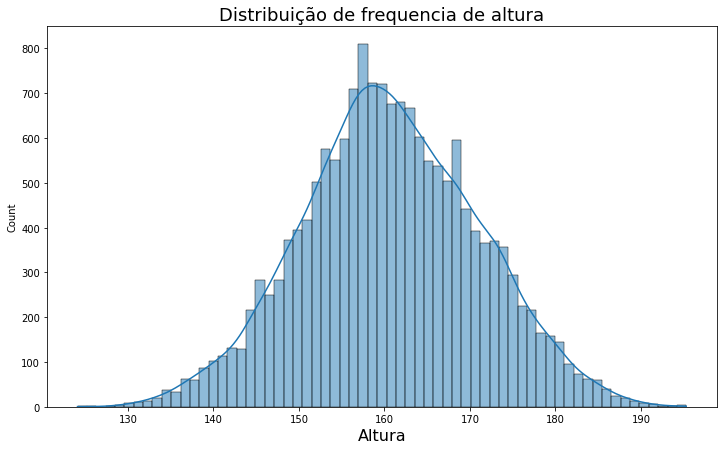

In [49]:
#VB17004 - Altura

ax = sns.histplot(data = dados, x = "VB17004", kde = True)
ax.figure.set_size_inches(12,7)
ax.set_title("Distribuição de frequencia de altura", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 16)
plt.show()

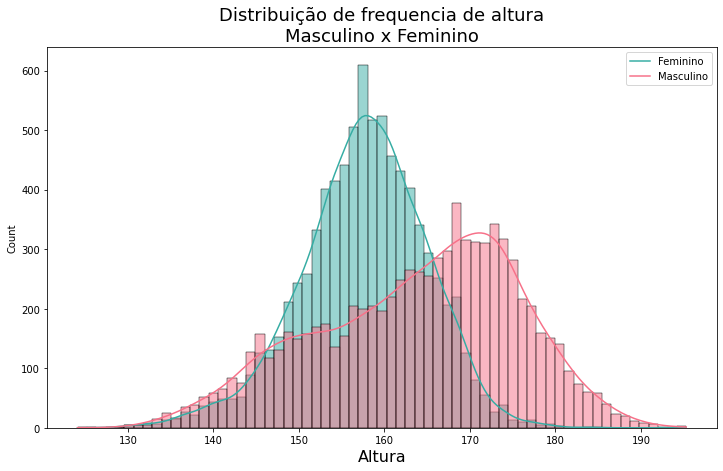

In [50]:
#VB17004 - Altura

ax = sns.histplot(data = dados, x = "VB17004", hue = "VB01001", kde = True, palette=sns.color_palette('husl',2))
ax.figure.set_size_inches(12,7)
ax.set_title("Distribuição de frequencia de altura\nMasculino x Feminino", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 16)
plt.legend(["Feminino","Masculino"])
plt.show()

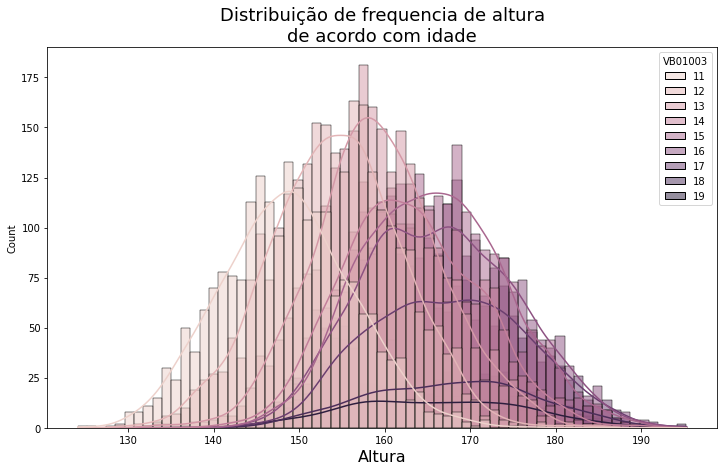

In [51]:
ax = sns.histplot(data = dados, x = "VB17004", hue = "VB01003", kde = True)
ax.figure.set_size_inches(12,7)
ax.set_title("Distribuição de frequencia de altura\nde acordo com idade", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 16)
plt.show()

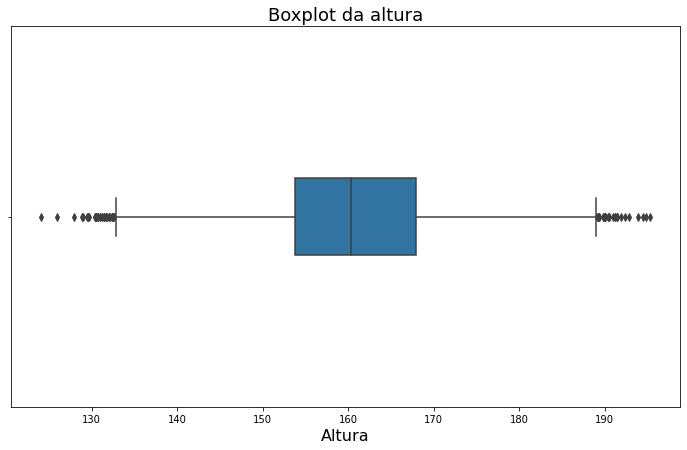

In [52]:
ax = sns.boxplot(data = dados, x = "VB17004", width = 0.2)
ax.figure.set_size_inches(12,7)
ax.set_title("Boxplot da altura", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 16)
plt.show()

In [53]:
dados["VB17004"].quantile([0.25,0.5,0.75])

0.25    153.8
0.50    160.4
0.75    167.9
Name: VB17004, dtype: float64

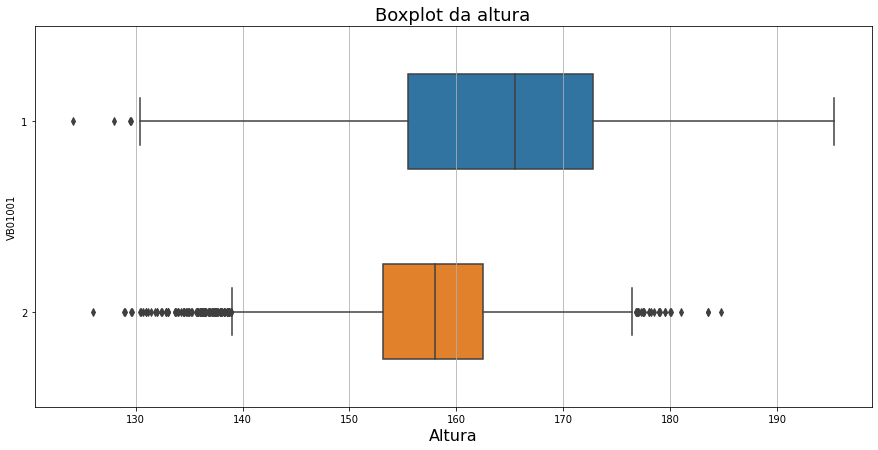

In [54]:
ax = sns.boxplot(data = dados, x = "VB17004",y = "VB01001", width = 0.5, orient = "h")
ax.figure.set_size_inches(15,7)
ax.set_title("Boxplot da altura", fontsize = 18)
ax.set_xlabel("Altura", fontsize = 16)
plt.grid(axis="x", )
plt.show()

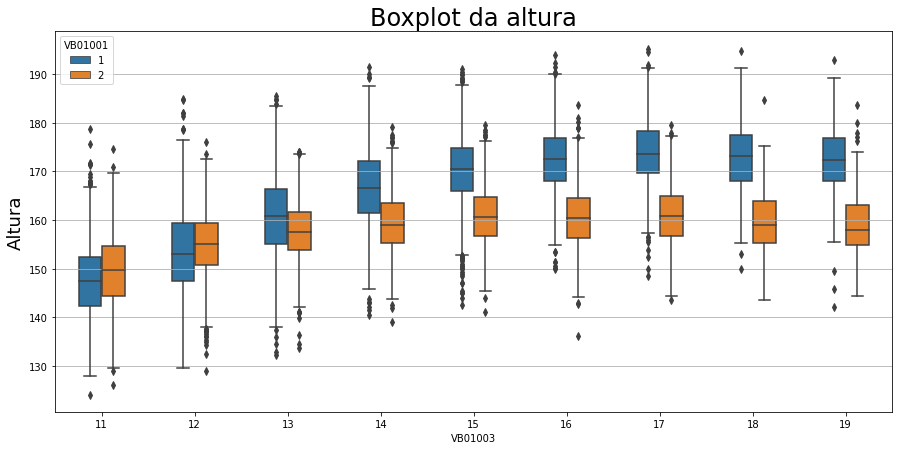

In [55]:
ax = sns.boxplot(data = dados, y = "VB17004",x = "VB01003", hue="VB01001", width = 0.5)
ax.figure.set_size_inches(15,7)
ax.set_title("Boxplot da altura", fontsize = 24)
ax.set_ylabel("Altura", fontsize = 18)
plt.grid(axis="y")
plt.show()

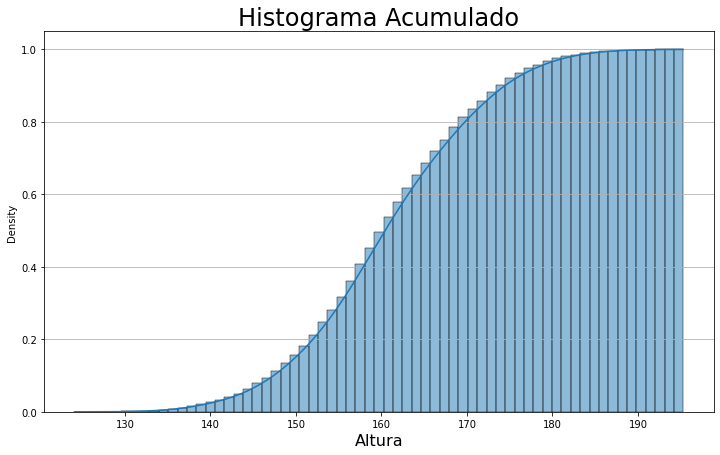

In [56]:

ax = sns.histplot(data = dados, x = "VB17004", 
                  kde = True, 
                  cumulative=True,
                  stat = "density")
ax.figure.set_size_inches(12,7)
ax.set_title("Histograma Acumulado", fontsize = 24)
plt.grid(axis = "y")
ax.set_xlabel("Altura", fontsize = 16)
plt.show()

### Desafio 01 - Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma.

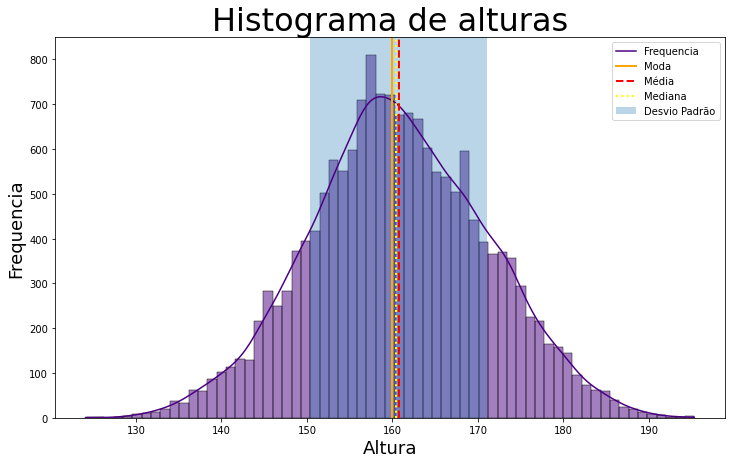

In [57]:

ax = sns.histplot(data = dados, x = "VB17004", 
                  kde = True, color = "indigo")
ax.figure.set_size_inches(12,7)
ax.set_title("Histograma de alturas", fontsize = 32)
plt.axvline(x = dados["VB17004"].mode()[0], lw = 2, color = "orange")
plt.axvline(x = dados["VB17004"].mean(), lw = 2, color = "red", linestyle = "--")
plt.axvline(x = dados["VB17004"].median(), lw = 2, color = "yellow", linestyle = ":")
plt.axvspan(xmin=(dados["VB17004"].mean()-(dados["VB17004"].std())), xmax = (dados["VB17004"].mean()+(dados["VB17004"].std())), alpha = 0.3)
ax.set_xlabel("Altura", fontsize = 18)
ax.set_ylabel("Frequencia", fontsize = 18)
ax.legend(["Frequencia", "Moda", "Média", "Mediana", "Desvio Padrão"])
plt.show()

### Desafio 02 - Fazer a análise com o histograma para outras informações da base de dados.

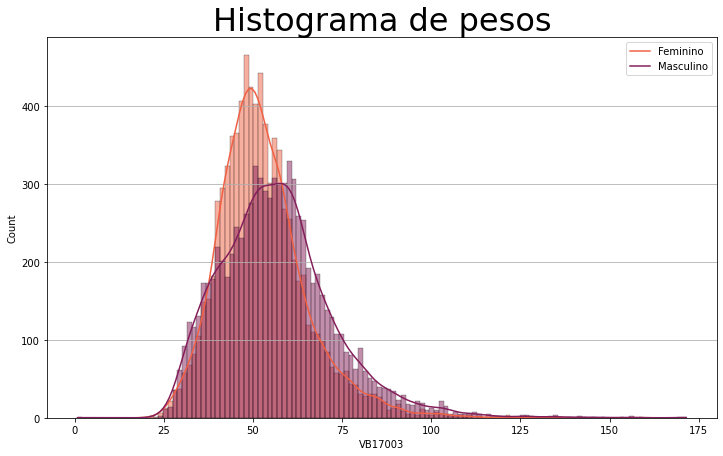

In [58]:
ax = sns.histplot( data = dados, x = "VB17003",
                  hue = "VB01001", kde = True, palette = sns.color_palette("rocket", 2))
ax.figure.set_size_inches(12,7)
ax.set_title("Histograma de pesos", fontsize = 32)
plt.grid(axis = 'y')
plt.legend(["Feminino","Masculino"])
plt.show()

### Desafio 03 - Pesquisar como é determinado os outliers no boxplot do seaborn. Calcular na mão utilizando a função .quantile()

In [59]:
# Estudo quartis de alturas

primeiro_quartil = dados['VB17004'].quantile(0.25)
terceiro_quartil = dados['VB17004'].quantile(0.75)
limite_inferior = primeiro_quartil - 1.5 *(terceiro_quartil - primeiro_quartil)
limite_superior = terceiro_quartil + 1.5 *(terceiro_quartil - primeiro_quartil)
print(limite_inferior)
print(limite_superior)

132.65000000000003
189.05


## Aula 05: Medida de centralidade e dispersão

In [60]:
dados["VB17004"].mean()

160.71311307078818

In [61]:
dados.groupby(by = "VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [62]:
dados["VB17004"].mode()

0    160.0
dtype: float64

In [63]:
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [64]:
salario_allan = 1000
salario_thiago = 9000
salario_medio = (salario_thiago + salario_allan) / 2
salario_medio

5000.0

In [65]:
media_altura = dados["VB17004"].mean()
media_altura

160.71311307078818

In [66]:
dados["media_altura"] = media_altura
diferenca_das_medias= dados["VB17004"] - dados["media_altura"]
dados["diferenca_medias"] = diferenca_das_medias
diferenca_quadrada = diferenca_das_medias**2
dados["diferenca_quadrada"] = diferenca_quadrada
dados[["VB17004","media_altura","diferenca_medias","diferenca_quadrada"]]

,VB17004,media_altura,diferenca_medias,diferenca_quadrada
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [67]:
varianca_amostral = (1/(len(dados)-1)) * dados["diferenca_quadrada"].sum()
varianca_amostral

106.91705244049119

In [68]:
dados["VB17004"].mean()

160.71311307078818

In [69]:
desvio_padrao = np.sqrt(varianca_amostral)
desvio_padrao

10.340070233827776

In [70]:
dados["VB17004"].std()

10.3400702338278

### Desafio 01 - Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord.

In [71]:
dados["VB17003"].mode()

0    50.0
dtype: float64

In [72]:
dados["VB17003"].mean()

54.70558105822677

In [73]:
dados["VB17003"].median()

52.9

In [74]:
dados["VB17003"].describe()

count    16556.000000
mean        54.705581
std         14.547864
min          0.800000
25%         45.000000
50%         52.900000
75%         62.000000
max        171.500000
Name: VB17003, dtype: float64

In [75]:
dados["IMC"].describe()

count    16556.000000
mean        20.958252
std          4.244441
min          0.397867
25%         18.049935
50%         20.190504
75%         22.965745
max         57.479596
Name: IMC, dtype: float64

### Desafio 02 - Fazer o calculo da média de altura e peso por sexo e idade, através do crosstab

In [76]:
frequencia_cruzada_desafio = pd.crosstab(dados["VB01003"], dados["VB01001"], 
                                         values = dados["VB17004"], aggfunc = "mean")
frequencia_cruzada_desafio.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada_desafio.rename_axis("Idade",axis=0,inplace=True)
frequencia_cruzada_desafio.rename_axis("Sexo",axis=1,inplace=True)
frequencia_cruzada_desafio

Sexo,Masculino,Feminino
Idade,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


In [77]:
frequencia_cruzada_desafio = pd.crosstab(dados["VB01003"], dados["VB01001"], 
                                         values = dados["VB17003"], aggfunc = "mean")
frequencia_cruzada_desafio.rename(columns={1: "Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada_desafio.rename_axis("Idade",axis=0,inplace=True)
frequencia_cruzada_desafio.rename_axis("Sexo",axis=1,inplace=True)
frequencia_cruzada_desafio

Sexo,Masculino,Feminino
Idade,,
11,42.530893,43.310605
12,47.016019,48.472532
13,52.321407,51.624820
14,57.890739,54.237782
15,62.315036,56.203367
16,64.673558,56.952231
17,67.892061,58.133201
18,67.562281,57.694118
19,69.146842,60.507018


### Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta.

In [78]:
excel = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_03/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

dados_excel = pd.read_excel(excel)

In [79]:
dados_excel.head(5)

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [80]:
# Montar o dicionario de codigo da coluna e qual é a pergunta referente ao código

dados_excel.set_index('VARIÁVEL', inplace = True)
dicionario_perguntas = {}
colunas_perguntas = list(dados_sem_mudancas.columns)

for i in colunas_perguntas:
  dicionario_perguntas[i] = dados_excel.loc[i][0]


# Definição de uma função para mostrar qual a pergunta referente ao código da coluna

def qual_a_pergunta(codigo : str):
  return print("A pergunta do código {} é: '{}'.".format(codigo,dicionario_perguntas[codigo]))


In [81]:
dicionario_perguntas

{'ANOPESQ': 'Ano em que a pesquisa foi realizada',
 'ESTRATOGEOREG': 'Indicador de estrato georeg',
 'ESTRATO_EXP': 'Expressão do estrato',
 'PAIS': 'País',
 'PESO': 'Peso do aluno de acordo com a amostra, utilizado para expansão',
 'REGEOGR': 'Região geográfica',
 'TEMPODESLOC': 'Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEDFIS': 'Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.',
 'TEMPOEST': 'A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEXTRA': 'Refere-se ao tempo médio diário acumulado pelo escolar com a prática de algu

In [82]:
# Testando se a função funciona

qual_a_pergunta('VB0901704')

A pergunta do código VB0901704 é: 'Outros familiares forçaram você a ter relação sexual?'.


In [83]:
# Testando uma outra forma de visualizar 

qual_a_pergunta(dados.columns[17])

A pergunta do código VB01015A é: 'Na sua casa tem computador (de mesa, ou netbook, laptop, etc)?'.


In [84]:

# Montar o dicionário das respostas das perguntas!
dados_excel.reset_index(inplace=True)
dicionario_respostas = {}
lista_indexes = []

# A função abaixo monta uma lista com o index das linhas do arquivo excel, em que temos perguntas

for variavel in dados_excel["VARIÁVEL"]:
  if variavel in colunas_perguntas:
    lista_indexes.append(dados_excel.query(f"VARIÁVEL == '{variavel}'").index[0])


''' 
Essa parte do código faz um looping dentro do range da quantidade de dados
da lista montada anteriormente. Cada vez que ela itera ela usa o valor daquele número inteiro
dentro daquela lista de indexes, assim se o primeiro index for o 5, ele na primeira interação
busca o index 5 com a função loc, porém como só quero as respostas, adicionamos +1 ao index
para buscar somente as respostas. Para delimitar ele busca no próximo item da lista de indexes
qual é o index e dessa vez substrai 1 do valor para selecionar somente os items dessa uma
única resposta. Assim atribui esse dataframe à uma variavel à um dicionário que foi 
adicionado no dicionário definido nessa célula como dicionario_respostas
'''

for i in range(len(lista_indexes)+1):
  if i == 180:
    dict_temp = dados_excel.loc[lista_indexes[i]+1:].set_index("VARIÁVEL")
    dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()  
  else:
    try:
      dict_temp = dados_excel.loc[lista_indexes[i]+1:lista_indexes[i+1]-1].set_index("VARIÁVEL")
      dict_temp = dict_temp.rename(columns ={'QUESTIONÁRIO DO ALUNO':dados_excel.loc[lista_indexes[i]][0]}).to_dict()
    except Exception:
      pass

  dicionario_respostas.update(dict_temp)

# Definição da função para retornar como são as respostas daquele código

def como_respostas(codigo:str):
  if dicionario_respostas[codigo] == {}:
    print("Resposta impossível de classificar") 
  else:
    return  dicionario_respostas[codigo]  

In [85]:
# Em alguns casos foram encontrados erros pelos resultados não terem classificações possíveis para gerar esse dicionario
#essa checagem de len é para ver se a quantidade de keys está correta

len(dicionario_respostas)

181

In [86]:
# checagem se o dicionario foi montado com sucesso

dicionario_respostas["VB01001"]

{'1': 'Masculino', '2': 'Feminino'}

In [87]:
# Em respostas quantitativas que não há classificação de respostas, 
#o dicionário ficou vazio

dicionario_respostas["PESO"]

{}

In [88]:
# Visualização da função

como_respostas("VB01001")

{'1': 'Masculino', '2': 'Feminino'}

In [89]:
# Visualização da função

como_respostas("PESO")

Resposta impossível de classificar


In [90]:
# A ideia dessa função é mostrar o que aquela código de coluna significa,
#mostrando a pergunta, e as possíveis respostas.

def descricao_pergunta(coluna : str):
  qual_a_pergunta(codigo = coluna)
  if dicionario_respostas[coluna] == {}:
    print("As respostas não foram possíveis de classificar, verifique diretamente no DataFrame")
  else:
    print("Respostas:")
    return dicionario_respostas[coluna]

In [91]:
descricao_pergunta("VB01003")

A pergunta do código VB01003 é: 'Qual é a sua idade?'.
Respostas:


{'11': '11 anos ou menos',
 '12': '12 anos',
 '13': '13 anos',
 '14': '14 anos',
 '15': '15 anos',
 '16': '16 anos ',
 '17': '17 anos',
 '18': '18 anos',
 '19': '19 anos ou mais'}

In [92]:
descricao_pergunta("PESO")

A pergunta do código PESO é: 'Peso do aluno de acordo com a amostra, utilizado para expansão'.
As respostas não foram possíveis de classificar, verifique diretamente no DataFrame


### Super-desafio 02: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM...

## Aula 06: Intervalo de confiança e Testes

In [93]:
from statsmodels.stats.weightstats import zconfint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [94]:
zconfint(dados["VB17004"].to_list())

(160.5556082427712, 160.87061789880892)

In [95]:
from statsmodels.stats.weightstats import DescrStatsW

In [96]:
descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura

In [97]:
descricao_altura.zconfint_mean()

(160.55560824277123, 160.87061789880894)

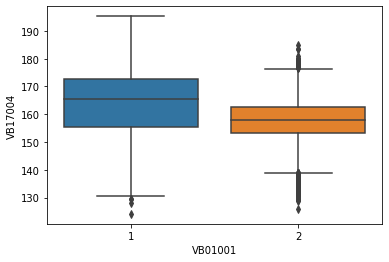

In [98]:
sns.boxplot(y = "VB17004", x = "VB01001",data = dados)

In [99]:
from statsmodels.stats.weightstats import ztest

In [100]:
distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

p_value = ztest(distribuicao_altura_m, distribuicao_altura_f)[1]
p_value

0.0

In [101]:
distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)[1]
p_value

1.0

In [102]:
from scipy.stats import normaltest

In [103]:
normaltest(distribuicao_altura_f)

NormaltestResult(statistic=212.51572610499005, pvalue=7.125189471020874e-47)

In [104]:
normaltest(distribuicao_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

In [105]:
from scipy.stats import ranksums

In [106]:
ranksums( distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

### Desafio 1: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculas para as outras colunas numéricas.

In [107]:
# Dados dos pesos

dados["VB17003"].describe()

count    16556.000000
mean        54.705581
std         14.547864
min          0.800000
25%         45.000000
50%         52.900000
75%         62.000000
max        171.500000
Name: VB17003, dtype: float64

In [108]:
# Dados dos pesos

dados["VB17003"].aggregate(["mean", "std", "var", "min", "max"]).round(2)

mean     54.71
std      14.55
var     211.64
min       0.80
max     171.50
Name: VB17003, dtype: float64

### Desafio 2: Ler e pesquisar sobre o que intervalo de confiança, nível de confiança e o que significância.



Tive certa dificuldade de compreender o uso de intervalo de confiança, mas compreendi com a utilização de alguns videos da internet. Porém o intervalo de confiança estima a % de confiança de que o valor real do parâmetro está no intervalo de confiança. O nível de confiança representa a porcentagem de intervalos que iriam incluir o parâmetro populacional se você reunisse amostras da mesma população, repetidas vezes. A significância estatística é considerada um procedimento para verificar a discrepância de uma hipótese estatística em relação aos dados observados.

### Desafio 3: Plotar o intervalo de confiança no histograma das alturas.

In [109]:
n = len(dados)
raiz_n = np.sqrt(n)
desvio_padrao = dados['VB17004'].std()

sigma = desvio_padrao / raiz_n
sigma

0.08036108278582069

In [110]:
from scipy.stats import norm

z = norm.ppf(0.975).round(2)
z

1.96

In [111]:
e = z * sigma
e

0.15750772226020854

In [112]:
intervalo = (
    dados['VB17004'].mean() - e,
    dados['VB17004'].mean() + e
)
intervalo

(160.55560534852796, 160.8706207930484)

In [113]:
#intervalo = norm.interval(alpha = 0.95, loc = dados['VB17004'].mean(), scale = sigma)
intervalo

(160.55560534852796, 160.8706207930484)

In [114]:
intervalo[0]

160.55560534852796

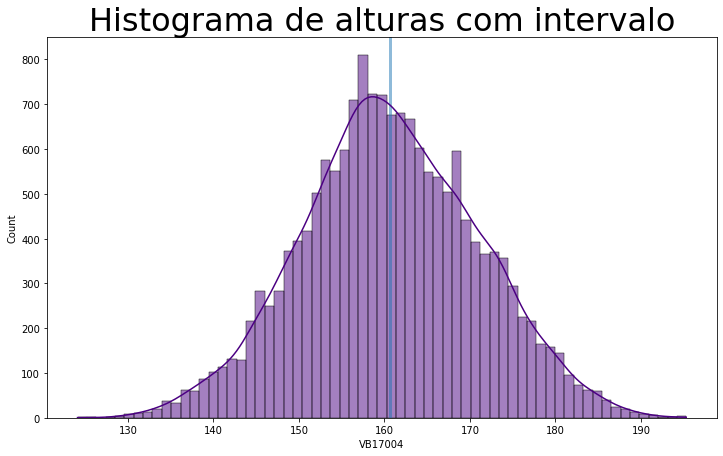

In [115]:
ax = sns.histplot(data = dados, x = "VB17004", 
                  kde = True, color = "indigo")
ax.figure.set_size_inches(12,7)
ax.set_title("Histograma de alturas com intervalo", fontsize = 32)
plt.axvspan(xmin=intervalo[0], xmax = intervalo[1], alpha = 0.5)

### Desafio 4: Realizar os testes de hipóteses de outras informações, explorando e enriquecendo a análise dos dados.

In [116]:
descr_peso = DescrStatsW(dados["VB17003"])

In [117]:
descr_peso.zconfint_mean()

(54.483981128508745, 54.92718098794451)

In [118]:
descr_peso.ztest_mean()

(483.84928986196786, 0.0)